In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats

plt.style.use('seaborn-white')
%matplotlib inline

In [2]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
iris_data.shape

(150, 5)

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
iris_data.duplicated().count()

150

In [10]:
features = iris_data.drop(columns='species')
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
target = iris_data.species
target.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

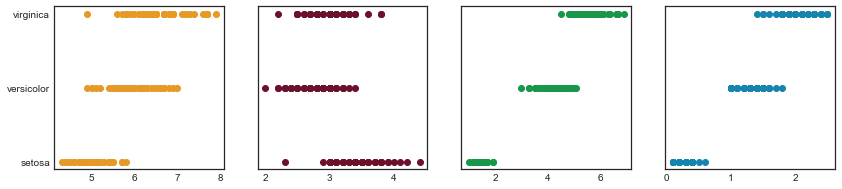

In [12]:
X_features = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
colors = ['#E69925', '#6C112C', '#18964A', '#1685AE']
fig, ax = plt.subplots(1, 4, figsize=(14, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(features.iloc[:,i], target, color=colors[i])
plt.suptitle('')
plt.show()

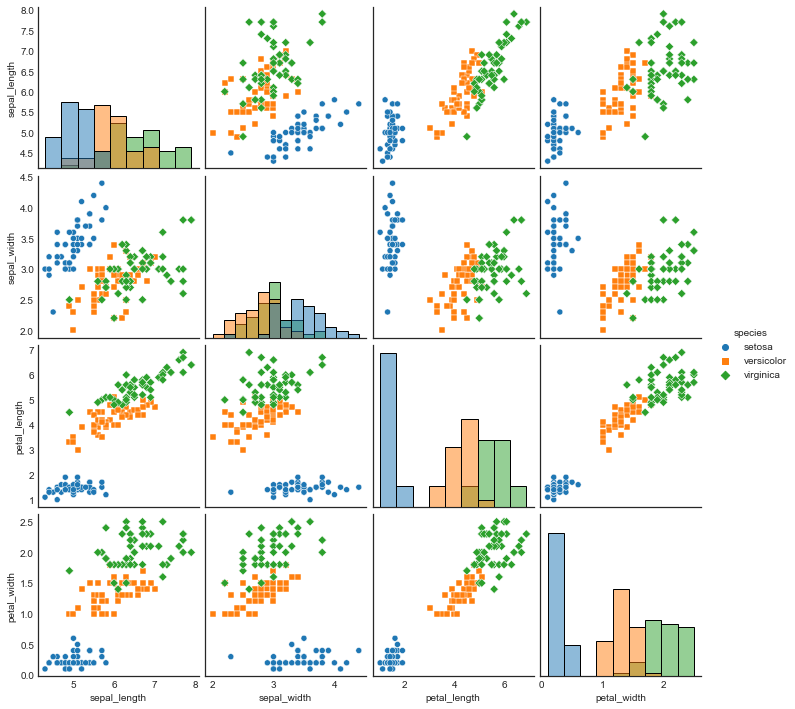

In [13]:
sns.pairplot(iris_data, hue='species', diag_kind='hist', markers=['o', 's', 'D'])

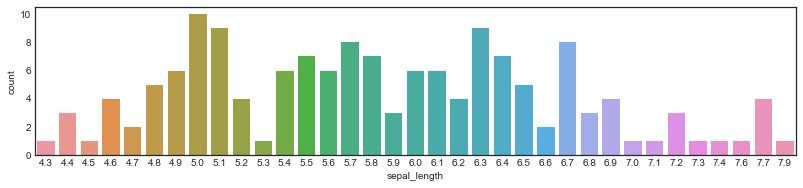

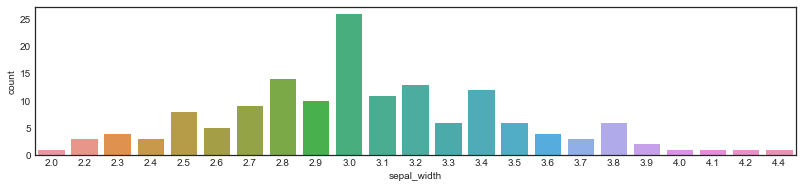

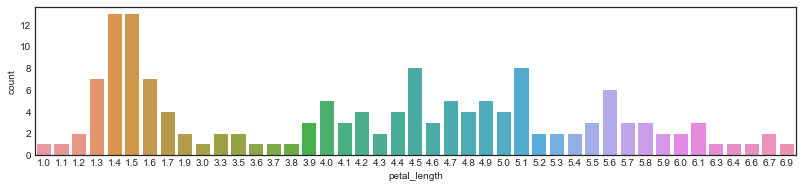

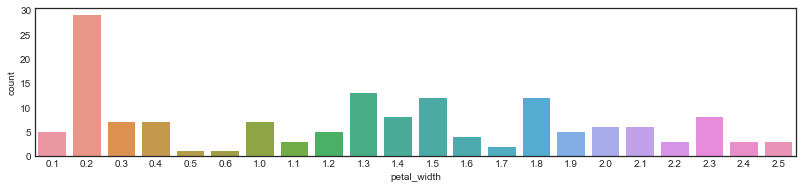

In [14]:
j = 1
for i in features.columns:
    plt.figure(figsize=(30, 6))
    plt.subplot(2, 2, j)
    sns.countplot(x=features[i], data=features, )
    j += 1

In [15]:
target.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
enc = LabelEncoder()
enc.fit(target)
enc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [17]:
target = enc.transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
for i in range(len(features.columns)):
    slope, intercept, r, p_value, std_err = stats.linregress(features.iloc[:,i], target)
    print(f'Least-squares regression between {features.columns[i]} and Species')
    print(f'Slope: {slope} \nIntercept: {intercept} \nR: {r} \nP_value: {p_value} \nSD_error: {std_err} \nCoefficient of Determination : {r**2:.5f}'); print()

Least-squares regression between sepal_length and Species
Slope: 0.7742124924552624 
Intercept: -3.523981664246917 
R: 0.782561231810082 
P_value: 2.89047835261354e-32 
SD_error: 0.05062927470882555 
Coefficient of Determination : 0.61240

Least-squares regression between sepal_width and Species
Slope: -0.8019236747651932 
Intercept: 3.451747981648784 
R: -0.4266575607811244 
P_value: 5.201563255177342e-08 
SD_error: 0.13972999622132287 
Coefficient of Determination : 0.18204

Least-squares regression between petal_length and Species
Slope: 0.440423892382368 
Intercept: -0.6551129875729391 
R: 0.9490346990083889 
P_value: 4.2018731529606896e-76 
SD_error: 0.01202278286654735 
Coefficient of Determination : 0.90067

Least-squares regression between petal_width and Species
Slope: 1.0280705618347874 
Intercept: -0.23299929382718854 
R: 0.9565473328764035 
P_value: 4.1553110153143295e-81 
SD_error: 0.025759593151953933 
Coefficient of Determination : 0.91498



In [19]:
correlation = iris_data.corr(method='spearman')
correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166778,0.881898,0.834289
sepal_width,-0.166778,1.000000,-0.309635,-0.289032
petal_length,0.881898,-0.309635,1.000000,0.937667
petal_width,0.834289,-0.289032,0.937667,1.000000


<AxesSubplot:>

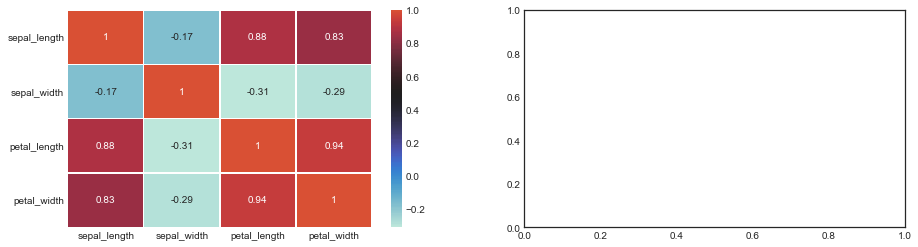

In [20]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
sns.heatmap(correlation, annot=True, cbar=True, center=0.5, linewidths=0.3)
plt.subplot(1, 2, 2)

In [21]:
# to check which lable was encoded to which discrete figure

enc.transform(enc.classes_)

array([0, 1, 2])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,
                                                   random_state=10)
X_train.head(10)

,sepal_length,sepal_width,petal_length,petal_width
58,6.6,2.9,4.6,1.3
97,6.2,2.9,4.3,1.3
129,7.2,3.0,5.8,1.6
114,5.8,2.8,5.1,2.4
146,6.3,2.5,5.0,1.9
47,4.6,3.2,1.4,0.2
124,6.7,3.3,5.7,2.1
120,6.9,3.2,5.7,2.3
118,7.7,2.6,6.9,2.3
141,6.9,3.1,5.1,2.3


In [23]:
y_train

array([1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)
print(f'Coefficient of the model, i.e weight = {model.coef_}')
print(f'Parameter \'b\' as bias in the model\'s = {model.intercept_}')

Coefficient of the model, i.e weight = [-0.16026507 -0.01033923  0.30051425  0.50068366]
Parameter 'b' as bias in the model's = 0.25132935740991


In [26]:
model.score(X_test, y_test)

0.9115961491141747

In [27]:
MSE = mean_squared_error(y_test, y_pred, squared=True)
print(f"The model's MSE for the predictions and true values = {MSE}")

The model's MSE for the predictions and true values = 0.04921147699310941


## Model building (manual)

In [28]:
features = np.array(features)

In [29]:
x_train, y_train = features, target
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [30]:
print("Type of x_train:",type(y_train))
print("First five elements of x_train are:\n", y_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [0 0 0 0 0]


In [31]:
m = x_train.shape[0]
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', m)

The shape of x_train is: (150, 4)
The shape of y_train is:  (150,)
Number of training examples (m): 150


##### For a Linear Regression, the learning algorithm for training the model is fw,b(X) = w*X + b, where X is the input varible, w and b being the parameters/coefficients/weigths of the model. fw,b(X) will be our predicted value known as y^ (y bar)
##### For the known parameters, that is, w and b of the model's: w = [-0.16026507 -0.01033923  0.30051425  0.50068366], b = 0.25132935740991

In [32]:
w = model.coef_
b = model.intercept_
print('Parameter w (weigth) of the model:', w)
print('Parameter b (bias) of the model:', b)

Parameter w (weigth) of the model: [-0.16026507 -0.01033923  0.30051425  0.50068366]
Parameter b (bias) of the model: 0.25132935740991


In [33]:
# implementing predicted y = w*x + b
w_dot_x = 0
predicted = []
for i in range(m):
    temp1 = np.dot(w, x_train[i])
    f_wb = (temp1 + b)
    predicted.append(round(f_wb))
    
print(predicted)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


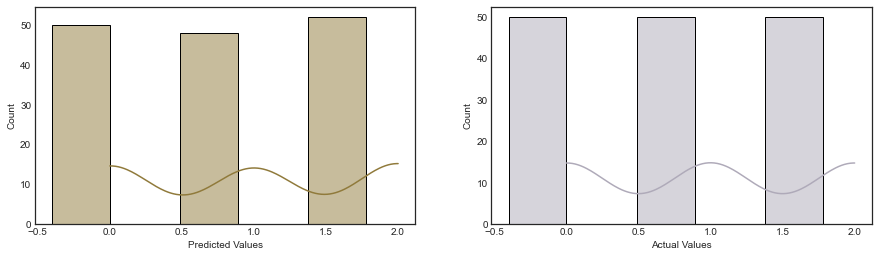

In [34]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=predicted, color='#907A3B', palette='hls', cbar=True, shrink=1.8, kde=True)
plt.xlabel('Predicted Values')
plt.subplot(1, 2, 2)
sns.histplot(data=y_train, color='#AFAAB9', palette='hls', cbar=True, shrink=1.8, kde=True)
plt.xlabel('Actual Values')
plt.show()

In [35]:
iris_data.min(axis=0)

sepal_length       4.3
sepal_width          2
petal_length         1
petal_width        0.1
species         setosa
dtype: object

In [36]:
iris_data.max(axis=0)

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [37]:
Plant_Species = {}
numbering = 0
for i in enc.classes_:
    Plant_Species[i] = numbering
    numbering += 1
print('Plant Species and it\'s corresponding predicted value: ',Plant_Species)

Plant Species and it's corresponding predicted value:  {'setosa': 0, 'versicolor': 1, 'virginica': 2}


### Predictions

In [38]:
def SpeciesName(data):
    Plant_Species = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
    for key, value in Plant_Species.items():
        if round(data) == value:
            return key.upper()

In [39]:
# Predicting new Species based on new features values using the model f_wd(x) = w*x + b
new_features1 = [4.8, 3, 4.9, 2.2]
predict1 = np.dot(w, new_features1) + b
print('For an input for Sepal_Length, Sepal_Width, Petal_Length, Petal_Width with values of')
print('4.8, 3, 4.9, 2.2 respectively, the prediction for it\'s Species type is ', SpeciesName(predict1))

For an input for Sepal_Length, Sepal_Width, Petal_Length, Petal_Width with values of
4.8, 3, 4.9, 2.2 respectively, the prediction for it's Species type is  VIRGINICA


In [40]:
new_features2 = [7.2, 4.4, 2.1, 0.9]
predict2 = np.dot(w, new_features2) + b
print('For an input for Sepal_Length, Sepal_Width, Petal_Length, Petal_Width with values of')
print('7.2, 4.4, 2.1, 0.9 respectively, the prediction for it\'s Species type is ', SpeciesName(predict2))

For an input for Sepal_Length, Sepal_Width, Petal_Length, Petal_Width with values of
7.2, 4.4, 2.1, 0.9 respectively, the prediction for it's Species type is  SETOSA


### Feature Scaling

##### Feature Scaling using Z-score Normalization:  First we need to find the mean followedby the Standard Deviationof the all the feature in the data. Then we apply the equation:  (Z-score Norm) X_j = (x_i - Mean)/S.D; where X_j is the Z-score for a feature, x_i is 

In [41]:
def zscore_nomalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each feature
    mu = np.mean(X, axis=0)
    # find the standard deviation of each feature
    std = np.std(X, axis=0)
    X_norm = (X - mu)/std
    return X_norm

In [42]:
df_features = pd.DataFrame(features, columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'], index=range(1, 151))
Xnorm_features = df_features.apply(zscore_nomalize_features)
Xnorm_features

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
1,-0.900681,1.019004,-1.340227,-1.315444
2,-1.143017,-0.131979,-1.340227,-1.315444
3,-1.385353,0.328414,-1.397064,-1.315444
4,-1.506521,0.098217,-1.283389,-1.315444
5,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
146,1.038005,-0.131979,0.819596,1.448832
147,0.553333,-1.282963,0.705921,0.922303
148,0.795669,-0.131979,0.819596,1.053935
149,0.432165,0.788808,0.933271,1.448832


In [43]:
arr_features = np.array(Xnorm_features)
arr_features[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [44]:
x_train, x_test, y_train, y_test = train_test_split(arr_features, target, test_size=0.2, random_state=0)

In [45]:
y_train[:10]

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1])

In [46]:
linregmodel = LinearRegression()
linregmodel.fit(x_train, y_train)

LinearRegression()

In [47]:
y_pred = linregmodel.predict(x_test)
for i in y_pred:
    np.append(y_pred, np.absolute(i))
print(y_pred)

[ 2.06844113  0.96345869 -0.14707913  1.81304847 -0.03927091  2.26261445
 -0.02790835  1.31919261  1.28225236  1.11236814  1.54774304  1.3013147
  1.21150471  1.32946956  1.32977882 -0.12060477  1.35574095  1.21453128
  0.03610115 -0.02518356  1.79941543  1.39427904  0.07356109  0.02146025
  1.59050985 -0.11917603  0.14803648  1.16645127  0.90550234  0.10586947]


In [48]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

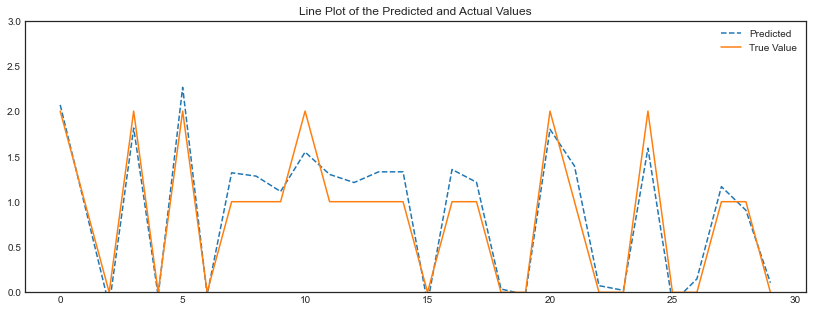

In [49]:
plt.rcParams['figure.figsize'] = (14, 5)
plt.plot(y_pred, linestyle='dashed', label='Predicted')
plt.plot(y_test, linestyle='solid', label='True Value')
plt.legend(loc='upper right')
plt.ylim(0, 3)
plt.title("Line Plot of the Predicted and Actual Values")
plt.show()